In [1]:
import numpy as np
import re

In [2]:
tom1_ref = 'C:\\Users\\Андрей Клычев\\Desktop\\Учеба\\War and Peace\\war_and_peace\\tom_1.txt'
tom2_ref = 'C:\\Users\\Андрей Клычев\\Desktop\\Учеба\\War and Peace\\war_and_peace\\tom_2.txt'
tom3_ref = 'C:\\Users\\Андрей Клычев\\Desktop\\Учеба\\War and Peace\\war_and_peace\\tom_3.txt'
tom4_ref = 'C:\\Users\\Андрей Клычев\\Desktop\\Учеба\\War and Peace\\war_and_peace\\tom_4.txt'

def clean_text(tom):
    with open(tom, 'r', encoding='utf-8') as f:
        text = f.read().lower()

    text = re.sub('[a-z\*,-\[\]»\.:;\)\(\'–\!«\…\d\`\'\„\“—\&\}\{\№\°]', '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('[\s]{2, 100}', '', text)
    return text

tom1 = clean_text(tom1_ref)
tom2 = clean_text(tom2_ref)
tom3 = clean_text(tom3_ref)
tom4 = clean_text(tom4_ref)

text = tom1 + tom2 + tom3 + tom4

In [3]:
len(text)

2790697

In [4]:
russian = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '
len(russian)

34

In [5]:
pos = {l: i for i, l in enumerate(russian)}

probabilities = np.zeros((len(russian), len(russian)))

In [6]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[pos[cp], pos[cn]] += 1

In [7]:
probabilities = (probabilities / probabilities.sum(axis=1))

In [8]:
probabilities[1]

array([1.38487099e-02, 6.00180054e-04, 2.02005017e-03, 5.96171256e-04,
       8.36879433e-04, 2.99557658e-02, 9.85221675e-04, 7.34484025e-04,
       5.07408159e-05, 1.24719749e-02, 0.00000000e+00, 7.20392142e-03,
       1.82845946e-02, 1.58383317e-03, 5.14761646e-03, 2.23060373e-02,
       0.00000000e+00, 2.98243720e-02, 1.60711372e-03, 1.33461852e-04,
       4.41806212e-02, 0.00000000e+00, 1.33272755e-02, 9.66066900e-04,
       1.65259457e-03, 5.62746201e-04, 7.90014684e-02, 2.74847870e-01,
       2.44634519e-01, 2.23045010e-03, 1.41723356e-04, 7.79312788e-04,
       2.31469595e-02, 1.23132591e-03])

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [14, 10]

In [10]:
index = [_ for _ in russian]

In [11]:
data = pd.DataFrame(probabilities, index=index, columns=index)

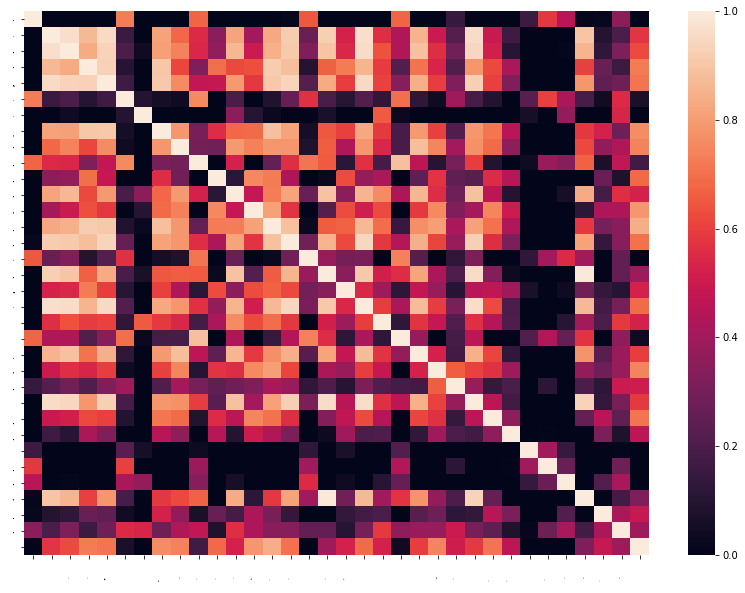

In [12]:
ax = sns.heatmap(data=data.corr(), vmin=0, vmax=1)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18, rotation=30)
plt.show()

In [13]:
words4 = re.findall('\ п\w{2}р\ ', text)
words = re.findall('\ \w+\ ', text)

Вероятность встретить слово из  4 букв с п до р

In [14]:
len(words4)/len(words)

0.006258747722291177

In [15]:
word = 'б'
l = 'б'

for _ in range(8):
    
        k = pos[l]
        s = list(probabilities[k]).index(max(probabilities[k]))
        l = list(pos.items())[s][0]
        if l != ' ':
            word += l
        else:
            k = pos[l]
            s = list(probabilities[k]).index(max(filter(lambda x: x < max(probabilities[k]), probabilities[k])))
            
        

In [16]:
print(f'Слово построенное по принципу наибольшей вероятности для предыдущей буквы: \n {word}')

Слово построенное по принципу наибольшей вероятности для предыдущей буквы: 
 бъющейэт


In [17]:
quebec = pd.read_csv('C:\\Users\\Андрей Клычев\\временные ряды\\monthly-car-sales-in-quebec-1960.csv')

series_q = quebec.Count

values = np.array(series_q).reshape(-1, 1)

In [18]:
!pip install hmmlearn

^C


In [32]:
from hmmlearn.hmm import GaussianHMM

Fitting a model with 119 free scalar parameters with only 108 data points will result in a degenerate solution.


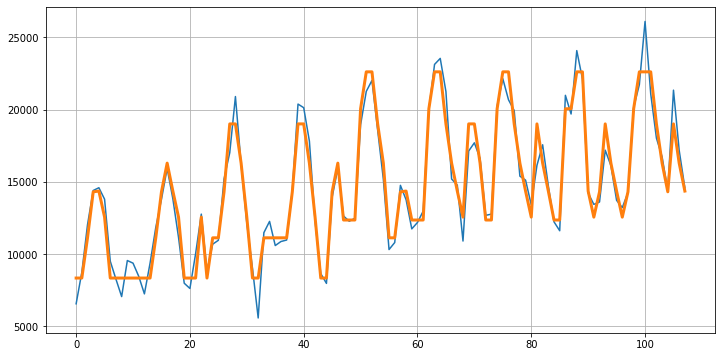

In [33]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)
plt.grid()
plt.show()

In [21]:

def rolling_mean(series, n):
    dotes = []
    
    if isinstance(series, pd.Series):
        for c in range(len(series)):

            
            dotes.append(series.loc[c:c+(n-1)].values.mean())
    else:
        for p in range(len(series)):
            dotes.append(sum(series[p:p+(n-1)])/len(series[p:p+(n-1)]))
    
    return dotes


In [34]:
mn = rolling_mean(series_q, 15)

In [35]:
y = np.array(mn[:105]).reshape(-1, 1)
X = np.array(series_q.index[:105]).reshape(-1, 1)

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [37]:
print(model.coef_, model.intercept_)

[[77.27105621]] [10983.85987577]


In [38]:
# Intermediate lines
bias1 = min(series_q)
bias2 = (model.intercept_[0] + bias1)/2
bias4 = max(series_q) - model.intercept_[0] +2500
bias3 = (bias4 + model.intercept_[0])/2

In [126]:
def intermediate_lines(n):
    
    
    x = np.array([i for i in range(108 + n)])

    y0 = np.array([k*model.coef_[0][0] + model.intercept_[0] + np.random.normal(0, 100) for k in x])

    y1 = np.array([k*model.coef_[0][0] + bias1 + np.random.normal(0, 100) for k in x])

    y2 = np.array([k*model.coef_[0][0] + bias2 + np.random.normal(0, 100) for k in x])

    y3 = np.array([k*model.coef_[0][0] + bias3 + np.random.normal(0, 100) for k in x])

    y4 = np.array([k*model.coef_[0][0] + bias4 + np.random.normal(0, 100) for k in x])
    
    return x, y0, y1, y2, y3, y4

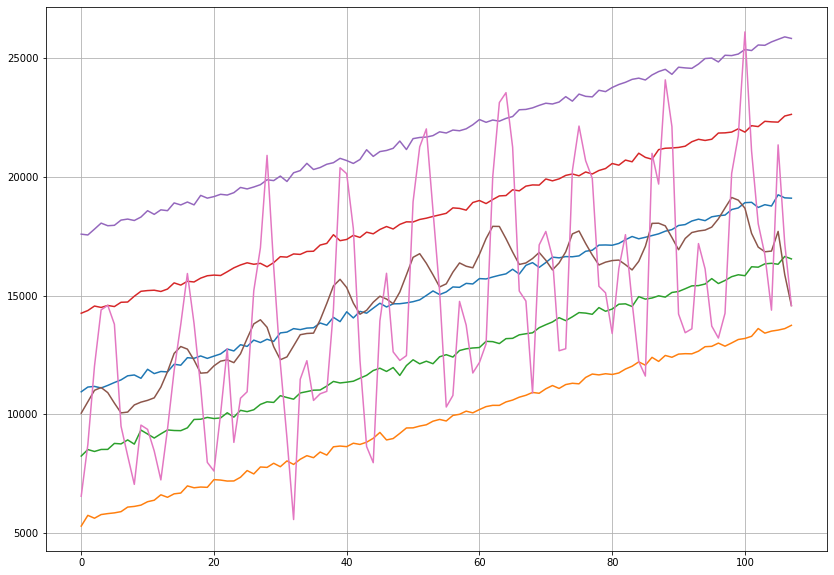

In [127]:
x, y0, y1, y2, y3, y4 = intermediate_lines(0)

plt.plot(x, y0)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)

plt.plot(mn)
plt.plot(series_q)

plt.grid()
plt.show()

In [134]:
# Вероятности подобраны так, чтобы предсказания были максимально похожи на оригинал

P = np.array([
    [0.1, 0.225, 0.225, 0.225, 0.225],
    [0.225, 0.1, 0.225, 0.225, 0.225],
    [0.225, 0.225, 0.1, 0.225, 0.225],
    [0.225, 0.225, 0.225, 0.1, 0.225],
    [0.225, 0.225, 0.225, 0.225, 0.1]])

In [135]:

def curve_synthesis(n):
    
    x, y0, y1, y2, y3, y4 = intermediate_lines(n)
    
    arr = []
    states = [0, 1, 2, 3, 4]
    for j in range(1000):    
        h = [0]
        for t in range(108 + n):
            h.append(np.random.choice(states, p=P[h[-1]]))
        arr.append(h)

    array = []
    for el in arr:
        f = []
        for r in range(len(el)-1):
            if el[r] == 0:
                f.append(y0[r])
            elif el[r] == 1:
                f.append(y1[r])
            elif el[r] == 2:
                f.append(y2[r])
            elif el[r] == 3:
                f.append(y3[r])
            elif el[r] == 4:
                f.append(y4[r])
        array.append(f)
        
    return array, n
    
def best_solution(array):
    
    errs = []
    
    for _ in range(1000):
        errs.append(mse(array[_][:len(series_q)], series_q))

    for u, m in enumerate(errs):
        if m == min(errs):
        
            break
    return u

In [91]:
from sklearn.metrics import mean_squared_error as mse

In [136]:
array, n = curve_synthesis(100)

In [137]:
best_solution(array)

483

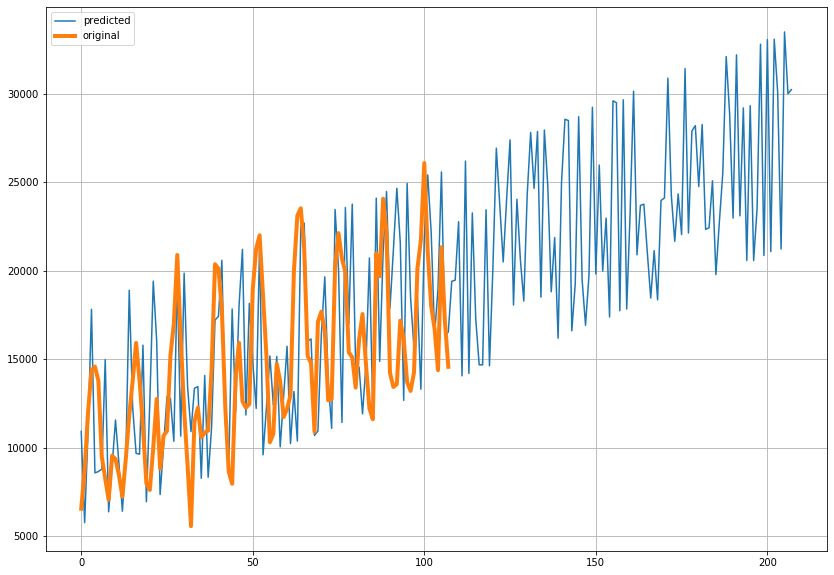

In [141]:
plt.plot(array[483], label ='predicted')
plt.plot(series_q, label = 'original', linewidth=4)
plt.legend()
plt.grid()